In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path of the dataset
dataset_path = "data/asl_alphabet_train/asl_alphabet_train"




In [4]:
# Initialize arrays to hold data and labels
data = []
labels = []
labels_dict = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25}

def load_data(dataset_path):
    # Loop through each subdirectory in the main directory
    for directory in os.listdir(dataset_path):
        if directory in labels_dict:
            print(f"{directory}")
            for file in os.listdir(f"{dataset_path}/{directory}"):
                # Open image file
                img = Image.open(f"{dataset_path}/{directory}/{file}")
                
                # Resize the image
                img = img.resize((64,64))

                # Convert image data to numpy array and flatten it
                img_data = np.array(img).flatten()

                # Append image data to data array
                data.append(img_data)

                # Append label to labels array
                labels.append(directory)
    return np.array(data), np.array(labels)



In [5]:
data, labels = load_data(dataset_path)

R
U
I
N
G
Z
T
S
A
F
O
H
M
J
C
D
V
Q
X
E
B
K
L
Y
P
W


In [6]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)


In [7]:
# Create a decision tree classifier
classifier = tree.DecisionTreeClassifier()

In [8]:
# Train the classifier
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [9]:
# Use the classifier to make predictions on the test set
predictions = classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 89.28%


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns



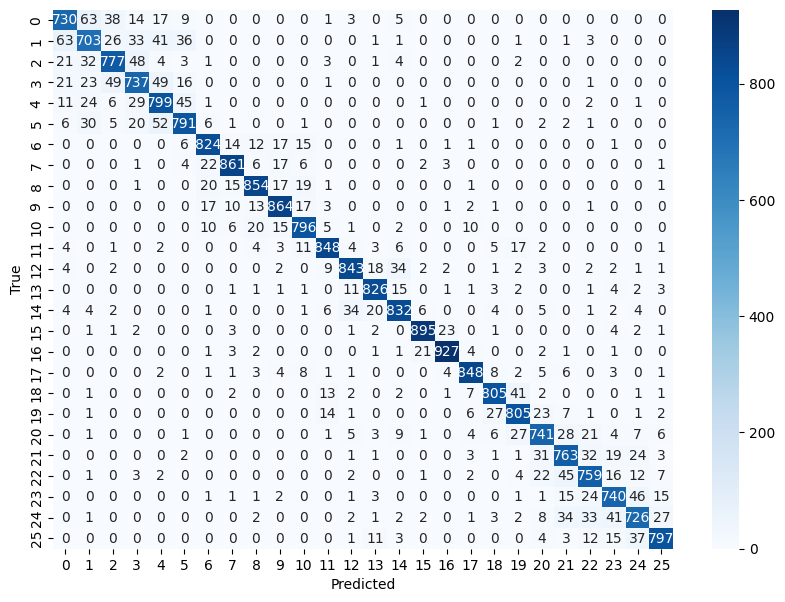

In [13]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()